In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.metrics import accuracy_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('Data/fraud_dataset.csv')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0


In [3]:
df.shape

(827, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    827 non-null    int64
 1   Married                   827 non-null    int64
 2   Dependents                827 non-null    int64
 3   Education                 827 non-null    int64
 4   Self_Employed             827 non-null    int64
 5   ApplicantIncome           827 non-null    int64
 6   CoapplicantIncome         827 non-null    int64
 7   LoanAmount                827 non-null    int64
 8   Loan_Term                 827 non-null    int64
 9   Credit_History_Available  827 non-null    int64
 10  Housing                   827 non-null    int64
 11  Locality                  827 non-null    int64
 12  Fraud_Risk                827 non-null    int64
dtypes: int64(13)
memory usage: 84.1 KB


In [5]:
df.isna().sum()

Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Term                   0
Credit_History_Available    0
Housing                     0
Locality                    0
Fraud_Risk                  0
dtype: int64

In [ ]:
# no missing values to be dealth with

In [6]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Term',
       'Credit_History_Available', 'Housing', 'Locality', 'Fraud_Risk'],
      dtype='object')

In [ ]:
# checking for outliers with help of boxplot

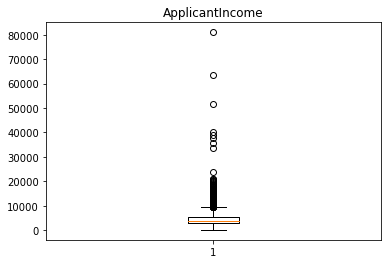

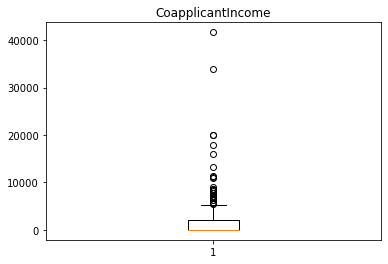

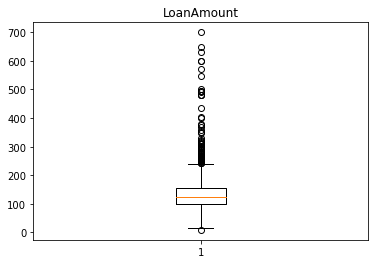

In [7]:

for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    
    plt.boxplot(df[i])
    plt.title(i)
    plt.show();

In [ ]:
# leaving outliers as is in first iteration 

In [8]:
#X,y split
X=df.drop('Fraud_Risk',axis=1)
y=df['Fraud_Risk']

In [9]:
#train _test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [10]:
# choosing maxdepth for RandomForestClassifier
for i in range(1,25):
    rfc=RandomForestClassifier(max_depth=i)
    rfc.fit(X_train,y_train)
    pred = rfc.predict(X_test)
    accuracy_score(y_test, pred)
    print(f'{i}    {accuracy_score(y_test, pred)}')

1    0.8995983935742972
2    0.8594377510040161
3    0.9156626506024096
4    0.9317269076305221
5    0.927710843373494
6    0.9357429718875502
7    0.9317269076305221
8    0.9397590361445783
9    0.9236947791164659
10    0.9317269076305221
11    0.9317269076305221
12    0.9357429718875502
13    0.9357429718875502
14    0.9317269076305221
15    0.9357429718875502
16    0.9317269076305221
17    0.9397590361445783
18    0.9357429718875502
19    0.9397590361445783
20    0.9317269076305221
21    0.9357429718875502
22    0.9317269076305221
23    0.9317269076305221
24    0.9357429718875502


In [ ]:
# best value seems to be max_depth  4

In [11]:
# choosing best max depth for DecisionTreeClassifier
for i in range(1,20):
    dtc=DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    pred = dtc.predict(X_test)
    print(f'{i}    {accuracy_score(y_test, pred)}')

1    0.9076305220883534
2    0.927710843373494
3    0.9236947791164659
4    0.9317269076305221
5    0.9236947791164659
6    0.9236947791164659
7    0.9236947791164659
8    0.9236947791164659
9    0.9036144578313253
10    0.9076305220883534
11    0.9036144578313253
12    0.8835341365461847
13    0.8955823293172691
14    0.8835341365461847
15    0.8755020080321285
16    0.8835341365461847
17    0.8795180722891566
18    0.891566265060241
19    0.891566265060241


In [ ]:
# best value seems to be max_depth  4

In [12]:
# RandomForestClassifier
rfc=RandomForestClassifier(max_depth=4)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
accuracy_score(y_test, pred)

0.927710843373494

In [14]:
# LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
accuracy_score(y_test, pred)

0.9236947791164659

In [15]:
# DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=9)
dtc.fit(X_train,y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9036144578313253

In [ ]:
#best results seems to be from random forest classifier with accuracy 92.7%

In [ ]:
#passed the required accuracy for modelrequired i.e. 85%

In [ ]:
#a model created successfully